<a href="https://colab.research.google.com/github/saniya1-709/Oasis-Infobyte-Internship/blob/main/EDA_on_retail_sales%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
sales_data = pd.read_csv(r"/retail_sales_dataset.csv")
# Display the first few rows
print(sales_data.head())


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
# Check for missing values
print(sales_data.info())
print(sales_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
# Convert Date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Verify the changes
print(sales_data.dtypes)


Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [6]:
# Check and remove duplicates
sales_data.drop_duplicates(inplace=True)


## **Descriptive Statistics**

In [8]:
# Basic statistics
print(sales_data.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

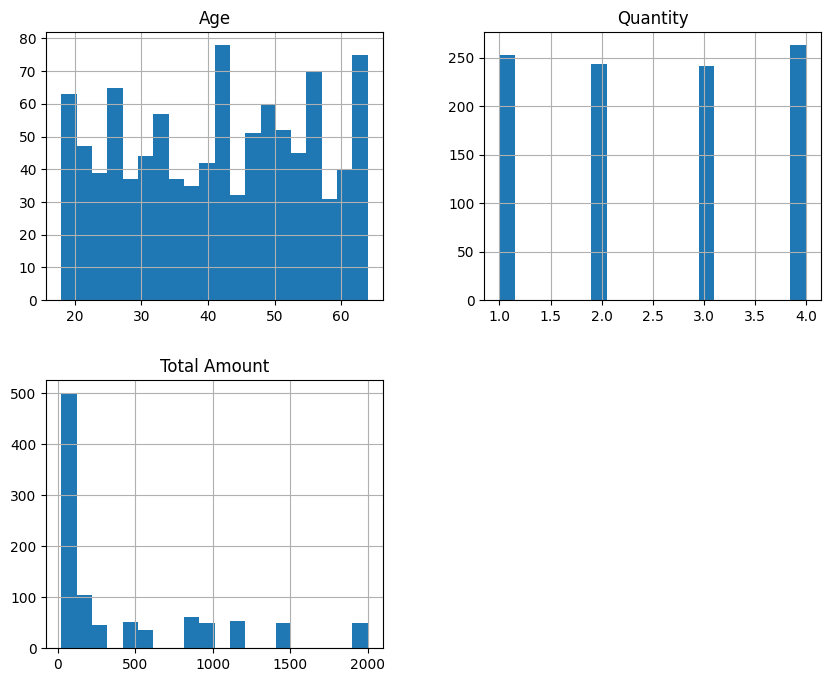

In [7]:
import matplotlib.pyplot as plt

# Plot histograms
sales_data[['Age', 'Quantity', 'Total Amount']].hist(bins=20, figsize=(10, 8))
plt.show()


## **Time Series Analysis**

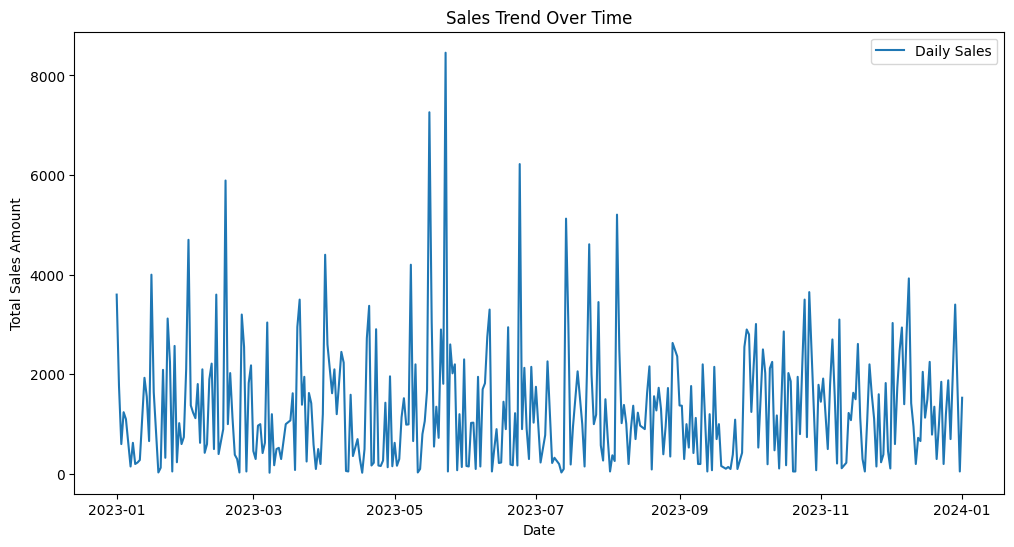

In [9]:
# Aggregate total sales by date
daily_sales = sales_data.groupby('Date')['Total Amount'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

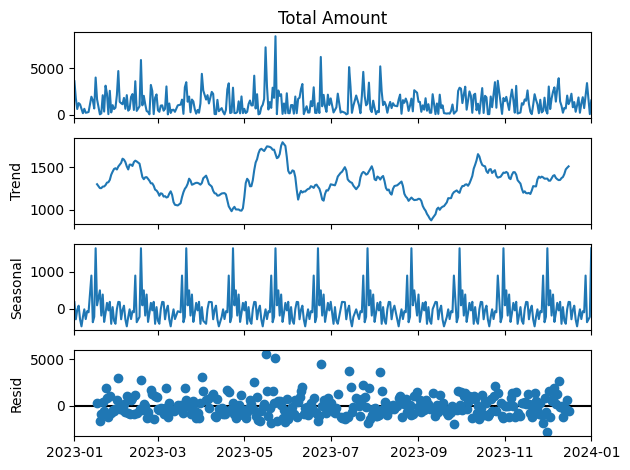

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decompose_result = seasonal_decompose(daily_sales, model='additive', period=30)
decompose_result.plot()
plt.show()


## **Customer and Product Analysis**

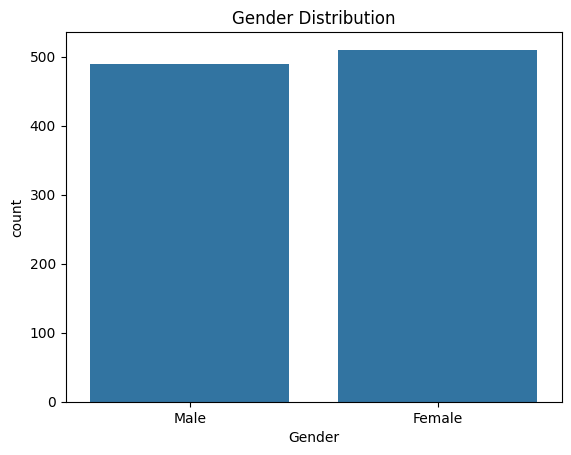

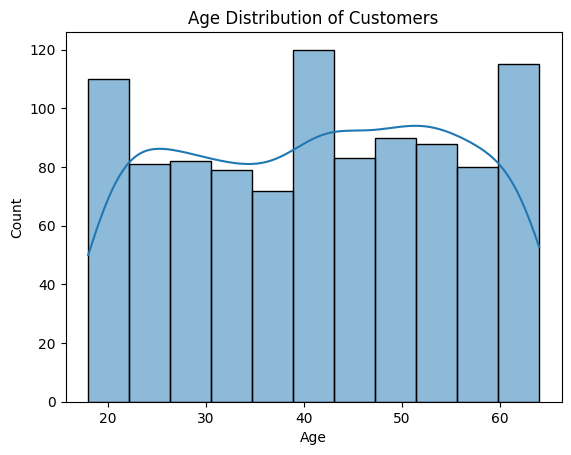

In [11]:
import seaborn as sns

# Gender distribution
sns.countplot(data=sales_data, x='Gender')
plt.title('Gender Distribution')
plt.show()

# Age distribution
sns.histplot(data=sales_data, x='Age', kde=True)
plt.title('Age Distribution of Customers')
plt.show()


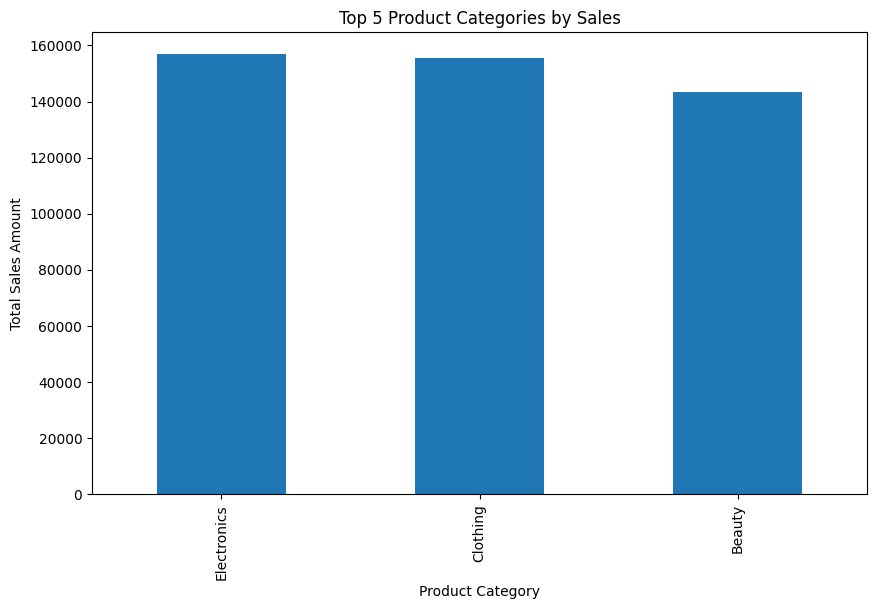

In [12]:
# Top 5 product categories by total sales
top_categories = sales_data.groupby('Product Category')['Total Amount'].sum().nlargest(5)

# Plot top product categories
top_categories.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.title('Top 5 Product Categories by Sales')
plt.show()


Average spending per transaction: 456.00
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


<ipython-input-13-5013c00f49a1>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_age = sales_data.groupby('Age Group')['Total Amount'].mean()


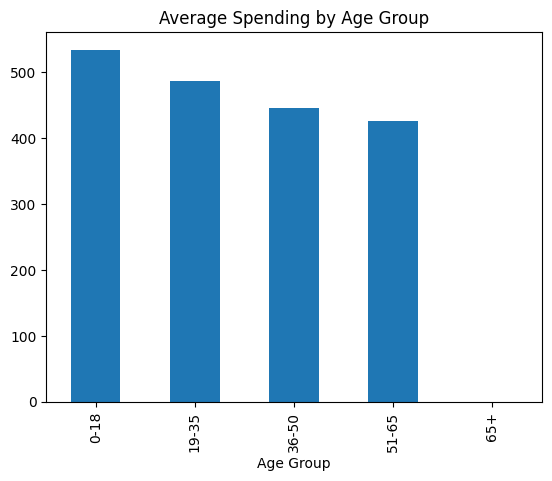

In [13]:
# Average spending per transaction
avg_spending = sales_data['Total Amount'].mean()
print(f'Average spending per transaction: {avg_spending:.2f}')

# Spending by gender
spending_by_gender = sales_data.groupby('Gender')['Total Amount'].mean()
print(spending_by_gender)

# Spending by age groups
sales_data['Age Group'] = pd.cut(sales_data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
spending_by_age = sales_data.groupby('Age Group')['Total Amount'].mean()
spending_by_age.plot(kind='bar')
plt.title('Average Spending by Age Group')
plt.show()


## **Visualisation**

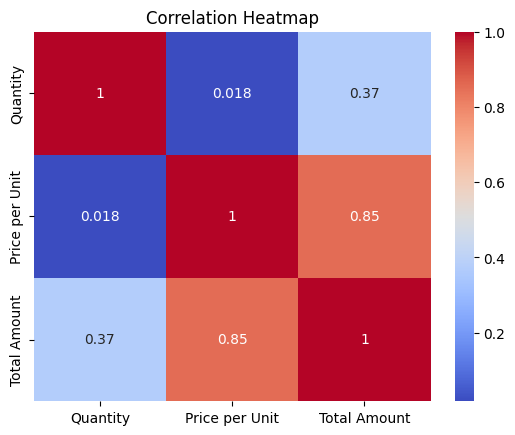

In [14]:
# Correlation heatmap
correlation = sales_data[['Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


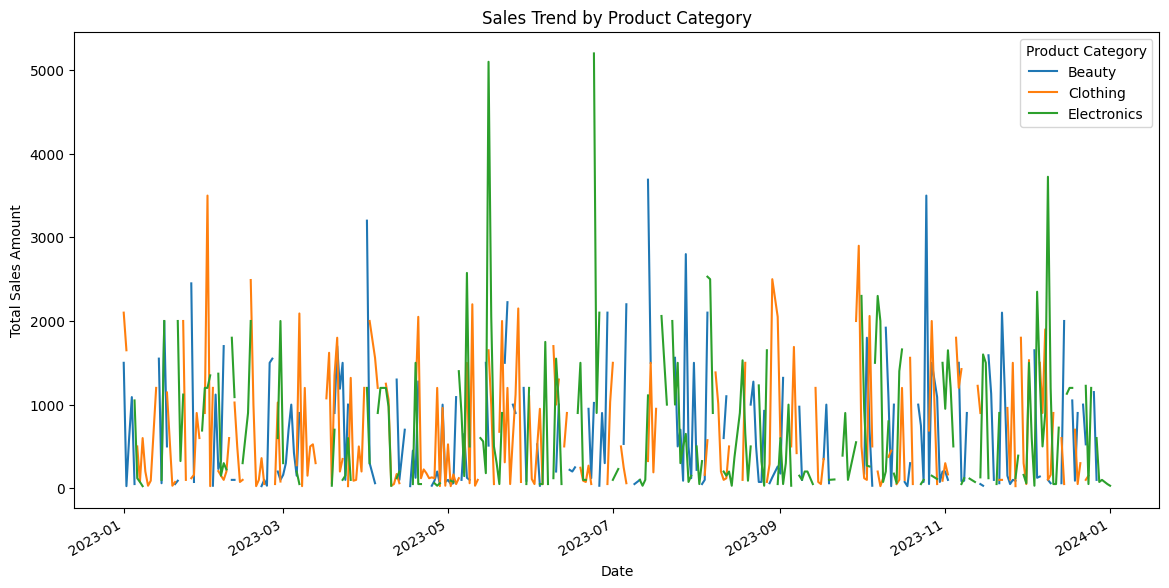

In [15]:
 # Sales trend by product category
category_sales = sales_data.groupby(['Date', 'Product Category'])['Total Amount'].sum().unstack()
category_sales.plot(kind='line', figsize=(14, 7))
plt.title('Sales Trend by Product Category')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.show()
